# Coffee Shop Sentiment Analysis using NLP: Code Summary

This notebook performs Natural Language Processing (NLP) on customer reviews to analyze sentiment and uncover insights related to coffee shop experiences. The main steps and functionalities are summarized below:

## 1. Data Loading
- **Functionality**: Loads customer review data, which includes text reviews, ratings, and possibly additional metadata about each review.
- **Purpose**: To prepare and structure raw data for text processing and sentiment analysis.

## 2. Text Preprocessing
- **Functionality**: Applies essential NLP preprocessing steps, such as:
  - **Tokenization**: Splits text into words or tokens.
  - **Lowercasing**: Converts text to lowercase for consistency.
  - **Stopwords Removal**: Removes common words that do not add significant meaning (e.g., "the", "is").
  - **Lemmatization/Stemming**: Reduces words to their base or root form.
- **Purpose**: To clean and standardize text data, making it more suitable for analysis and model training.

## 3. Feature Extraction
- **Functionality**: Converts text data into numerical features using methods like:
  - **TF-IDF Vectorization**: Assigns importance to words based on frequency in documents.
  - **Word Embeddings**: (Optional) Uses pre-trained word vectors for deeper semantic analysis.
- **Purpose**: To create meaningful features from the text for sentiment classification and other analyses.

## 4. Sentiment Analysis
- **Functionality**: Applies sentiment analysis to categorize reviews as positive, negative, or neutral, potentially using:
  - **Rule-Based Methods**: Basic techniques, such as counting positive and negative words.
  - **Machine Learning Models**: Supervised models trained on labeled data to classify sentiment.
- **Purpose**: To understand customer sentiment regarding different aspects of coffee shop experiences.

## 5. Data Visualization
- **Functionality**: Creates visualizations to explore data distributions and sentiment trends, using plots such as:
  - **Sentiment Distribution Histograms**: Displays overall, service, and price sentiment.
  - **Word Clouds**: Highlights frequently used words in reviews.
- **Purpose**: To provide visual insights and make interpreting patterns in customer reviews easier.

---

### by Lavenya Mohanasundaram


In [1]:
import pandas as pd

In [2]:
# Load the datasets
ratings_and_sentiments = pd.read_csv('Yelp Data Set - Coffee/ratings_and_sentiments.csv', encoding='ISO-8859-1')
raw_yelp_review_data = pd.read_csv('Yelp Data Set - Coffee/raw_yelp_review_data.csv', encoding='ISO-8859-1')
sentiments_by_shop = pd.read_csv('Yelp Data Set - Coffee/sentiments_by_shop.csv', encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: 'Yelp Data Set - Coffee/ratings_and_sentiments.csv'

In [ ]:
# Display basic information about the datasets
ratings_and_sentiments_info = ratings_and_sentiments.info()
raw_yelp_review_data_info = raw_yelp_review_data.info()
sentiments_by_shop_info = sentiments_by_shop.info()

ratings_and_sentiments_info, raw_yelp_review_data_info, sentiments_by_shop_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7616 non-null   object 
 1   review_text       7616 non-null   object 
 2   rating            7616 non-null   object 
 3   num_rating        7616 non-null   float64
 4   cat_rating        7616 non-null   object 
 5   bool_HIGH         7616 non-null   float64
 6   overall_sent      7616 non-null   float64
 7   vibe_sent         4507 non-null   object 
 8   tea_sent          7616 non-null   float64
 9   service_sent      7616 non-null   float64
 10  seating_sent      7616 non-null   float64
 11  price_sent        7616 non-null   float64
 12  parking_sent      7616 non-null   object 
 13  location_sent     7616 non-null   float64
 14  alcohol_sent      7616 non-null   float64
 15  coffee_sent       7616 non-null   object 
 16  food_sent         7616 non-null   object 


(None, None, None)

In [ ]:
# Merging the datasets on the 'coffee_shop_name' column
merged_data = pd.merge(ratings_and_sentiments, raw_yelp_review_data, on='coffee_shop_name', how='outer')
merged_data = pd.merge(merged_data, sentiments_by_shop, on='coffee_shop_name', how='outer')

# Displaying the first few rows to understand the merged structure
merged_data.head()

,coffee_shop_name,review_text,rating_x,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,...,internet,food,alcohol,seating,service,parking,location,local,price,hours
0,Alta's Cafe,10/14/2016 1 check-in I'll start by saying I ...,4.0 star rating,4.0,HIGH,1.0,-2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
1,Alta's Cafe,10/9/2016 Love Alta's. Great spot to stop if ...,4.0 star rating,4.0,HIGH,1.0,2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
2,Alta's Cafe,9/12/2016 This place is great if the weather ...,4.0 star rating,4.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
3,Alta's Cafe,9/2/2016 1 check-in Wow - a hidden gem. Alta...,5.0 star rating,5.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
4,Alta's Cafe,11/30/2016 There are few places on Town Lake ...,1.0 star rating,1.0,LOW,0.0,-2.0,NaN,0.0,-1.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845005 entries, 0 to 845004
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   coffee_shop_name  845000 non-null  object 
 1   review_text       843409 non-null  object 
 2   rating_x          843409 non-null  object 
 3   num_rating        843409 non-null  float64
 4   cat_rating        843409 non-null  object 
 5   bool_HIGH         843409 non-null  float64
 6   overall_sent      843409 non-null  float64
 7   vibe_sent         566884 non-null  object 
 8   tea_sent          843409 non-null  float64
 9   service_sent      843409 non-null  float64
 10  seating_sent      843409 non-null  float64
 11  price_sent        843409 non-null  float64
 12  parking_sent      843409 non-null  object 
 13  location_sent     843409 non-null  float64
 14  alcohol_sent      843409 non-null  float64
 15  coffee_sent       843409 non-null  object 
 16  food_sent         84

In [ ]:
# Remove duplicate rows
merged_data.drop_duplicates(inplace=True)
merged_data.head()

,coffee_shop_name,review_text,rating_x,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,...,internet,food,alcohol,seating,service,parking,location,local,price,hours
0,Alta's Cafe,10/14/2016 1 check-in I'll start by saying I ...,4.0 star rating,4.0,HIGH,1.0,-2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
1,Alta's Cafe,10/9/2016 Love Alta's. Great spot to stop if ...,4.0 star rating,4.0,HIGH,1.0,2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
2,Alta's Cafe,9/12/2016 This place is great if the weather ...,4.0 star rating,4.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
3,Alta's Cafe,9/2/2016 1 check-in Wow - a hidden gem. Alta...,5.0 star rating,5.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
4,Alta's Cafe,11/30/2016 There are few places on Town Lake ...,1.0 star rating,1.0,LOW,0.0,-2.0,NaN,0.0,-1.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594775 entries, 0 to 845000
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   coffee_shop_name  594774 non-null  object 
 1   review_text       593183 non-null  object 
 2   rating_x          593183 non-null  object 
 3   num_rating        593183 non-null  float64
 4   cat_rating        593183 non-null  object 
 5   bool_HIGH         593183 non-null  float64
 6   overall_sent      593183 non-null  float64
 7   vibe_sent         366658 non-null  object 
 8   tea_sent          593183 non-null  float64
 9   service_sent      593183 non-null  float64
 10  seating_sent      593183 non-null  float64
 11  price_sent        593183 non-null  float64
 12  parking_sent      593183 non-null  object 
 13  location_sent     593183 non-null  float64
 14  alcohol_sent      593183 non-null  float64
 15  coffee_sent       593183 non-null  object 
 16  food_sent         593183 

In [ ]:
# Generate and display summary statistics directly
summary_statistics = merged_data.describe(include='all')
print("Summary Statistics for Cleaned Data:")
print(summary_statistics)

Summary Statistics for Cleaned Data:
       coffee_shop_name                                        review_text  \
count            594774                                             593183   
unique               97                                               6915   
top       Epoch Coffee    12/20/2013 21 check-ins ROTD 4/28/2014 This r...   
freq              60000                                                400   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

                 rating_x 

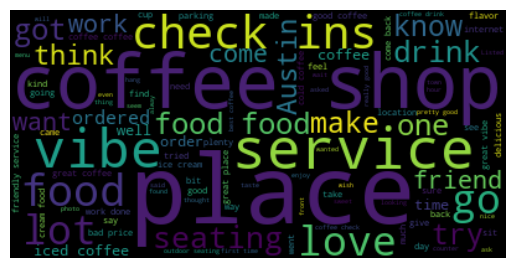

In [ ]:
# prompt: word cloud for the dataframe

# Install wordcloud if not already installed
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame and 'review_text' is the column with the review text
text = " ".join(review for review in merged_data.review_text.astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# prompt: do sentiment analysis using nlp

!pip install nltk

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment of a text
def analyze_sentiment(text):
  scores = analyzer.polarity_scores(text)
  compound_score = scores['compound']

  if compound_score >= 0.05:
    return 'Positive'
  elif compound_score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

# Apply sentiment analysis to the 'review_text' column
merged_data['sentiment'] = merged_data['review_text'].astype(str).apply(analyze_sentiment)

# Display the updated DataFrame with sentiment analysis
print(merged_data[['review_text', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lavyh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                         review_text sentiment
0   10/14/2016 1 check-in I'll start by saying I ...  Negative
1   10/9/2016 Love Alta's. Great spot to stop if ...  Positive
2   9/12/2016 This place is great if the weather ...  Positive
3   9/2/2016 1 check-in Wow - a hidden gem.  Alta...  Positive
4   11/30/2016 There are few places on Town Lake ...  Positive


In [ ]:
# prompt: generate summary for the above sentiment analysis

# Analyze the overall sentiment distribution
sentiment_counts = merged_data['sentiment'].value_counts()
print("\nOverall Sentiment Distribution:")
print(sentiment_counts)

# Analyze sentiment by coffee shop (if applicable)
sentiment_by_shop = merged_data.groupby('coffee_shop_name')['sentiment'].value_counts().unstack().fillna(0)
print("\nSentiment Distribution by Coffee Shop:")
print(sentiment_by_shop)

# Generate a summary of the analysis
print("\nSentiment Analysis Summary:")
print("-" * 30)
print("The analysis of coffee shop reviews reveals the following:")
print(f"- The overall sentiment distribution is as follows: {sentiment_counts}")
print("- Further analysis can be done to identify specific shops with predominantly positive or negative reviews.")
print("- Additionally, this information can be used to understand customer preferences for various shops based on the sentiments expressed in their reviews.")

# You can add more summary insights based on your specific needs and dataset characteristics.


Overall Sentiment Distribution:
sentiment
Positive    548831
Negative     40393
Neutral       5551
Name: count, dtype: int64

Sentiment Distribution by Coffee Shop:
sentiment                     Negative  Neutral  Positive
coffee_shop_name                                         
Alta's Cafe                       10.0      1.0      89.0
Altaâs Cafe                      0.0    100.0       0.0
Anderson's Coffee Company          3.0      1.0      96.0
Andersonâs Coffee Company        0.0    100.0       0.0
Apanas Coffee & Beer             472.0      0.0   13452.0
...                                ...      ...       ...
Thunderbird Coffee               700.0      0.0    9300.0
Trianon Coffee                   588.0      0.0    9016.0
Tuscany At 360                    99.0     33.0     957.0
Venezia Italian Gelato           200.0      0.0   19800.0
Vintage Heart Coffee               0.0      0.0   10000.0

[97 rows x 3 columns]

Sentiment Analysis Summary:
----------------------------

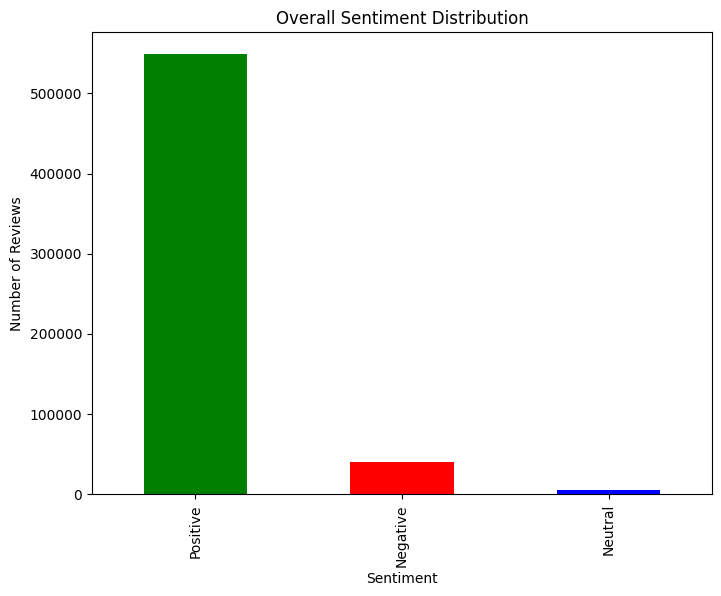

In [ ]:
# prompt: visualization with bar chart for the sentiment_by_shop and sentiment_counts

# Visualize sentiment counts with a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()



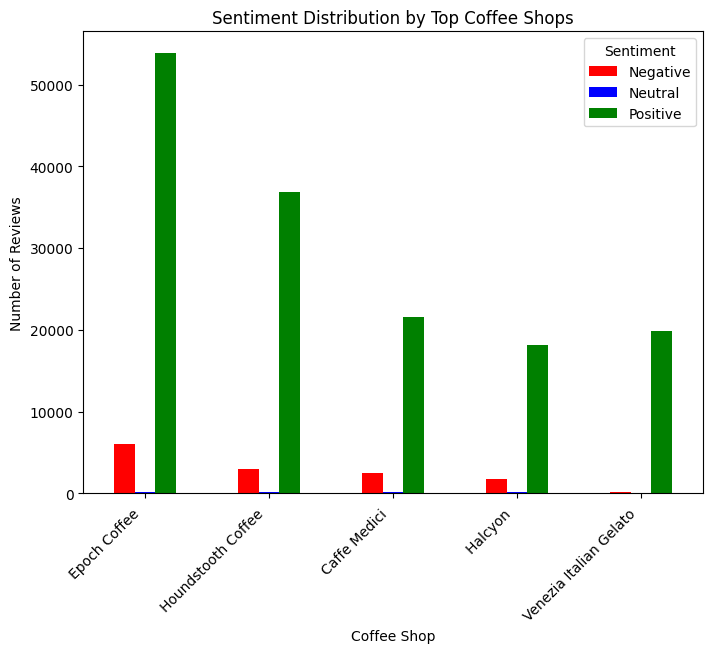

In [ ]:
# Visualize sentiment by shop with a bar chart (for a few shops for better visualization)
top_shops = sentiment_by_shop.sum(axis=1).nlargest(5).index  # Get top 5 shops with most reviews
sentiment_by_shop_top = sentiment_by_shop.loc[top_shops]
sentiment_by_shop_top.plot(kind='bar', figsize=(8, 6),color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution by Top Coffee Shops')
plt.xlabel('Coffee Shop')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
df= merged_data

In [ ]:
# Count missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values per Column:")
print(missing_values[missing_values > 0])




Missing Values per Column:
vibe_sent           228117
price                85144
hours                85144
num_reviews          85144
rating_y             85144
coffee               85144
tea                  85144
vibe                 85144
internet             85144
food                 85144
alcohol              85144
seating              85144
service              85144
parking              85144
location             85144
local                85144
hours_sent            1692
review_text           1592
local_sent            1592
food_sent             1592
service_sent          1592
rating_x              1592
num_rating            1592
cat_rating            1592
bool_HIGH             1592
overall_sent          1592
tea_sent              1592
seating_sent          1592
price_sent            1592
parking_sent          1592
location_sent         1592
alcohol_sent          1592
coffee_sent           1592
internet_sent         1592
full_review_text      1449
star_rating           1449
c

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

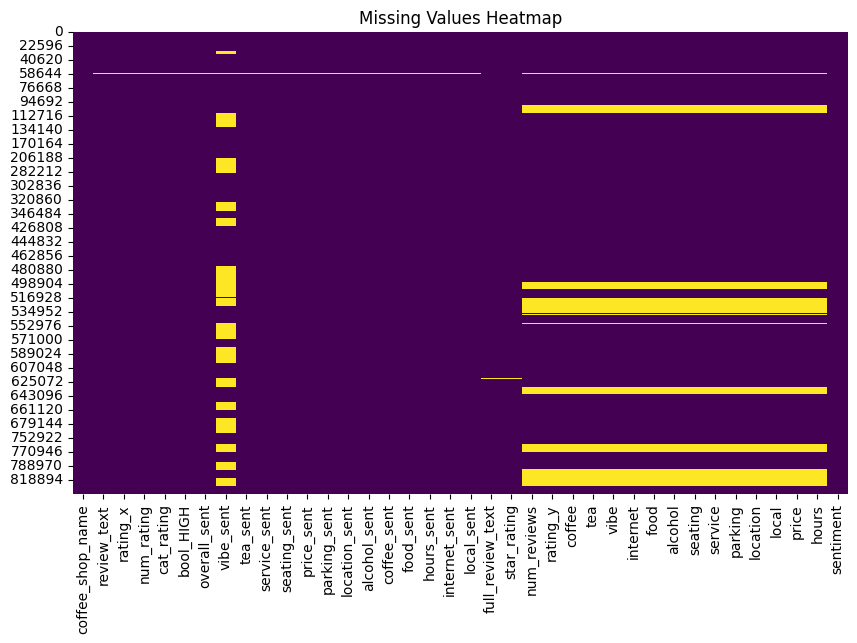

In [ ]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

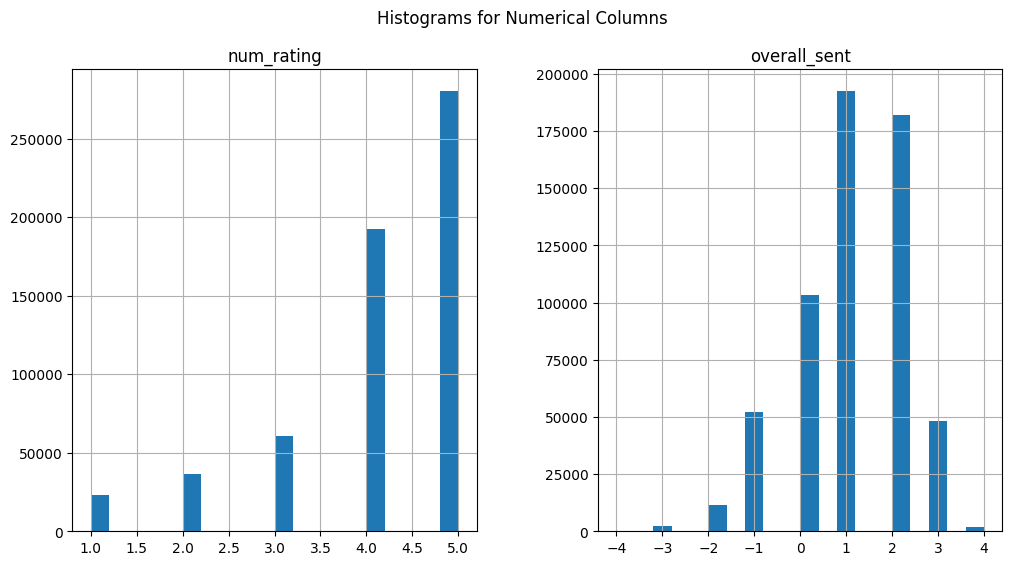

In [ ]:
# Histograms for numerical columns
df[['rating_x', 'num_rating', 'overall_sent']].hist(bins=20, figsize=(12, 6))
plt.suptitle("Histograms for Numerical Columns")
plt.show()


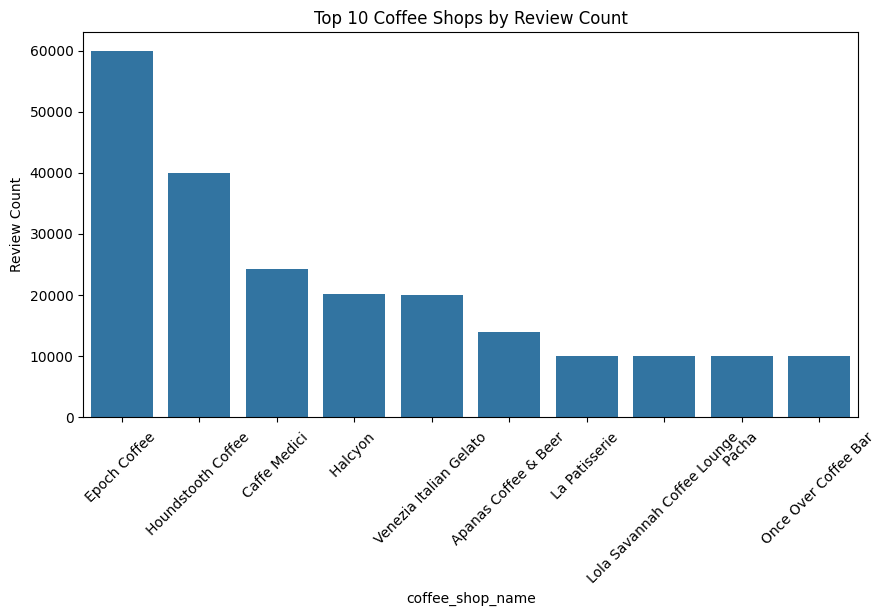

In [ ]:
# Count plot for coffee shop names (top 10 most frequent only)
top_shops = df['coffee_shop_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_shops.index, y=top_shops.values)
plt.xticks(rotation=45)
plt.title("Top 10 Coffee Shops by Review Count")
plt.ylabel("Review Count")
plt.show()


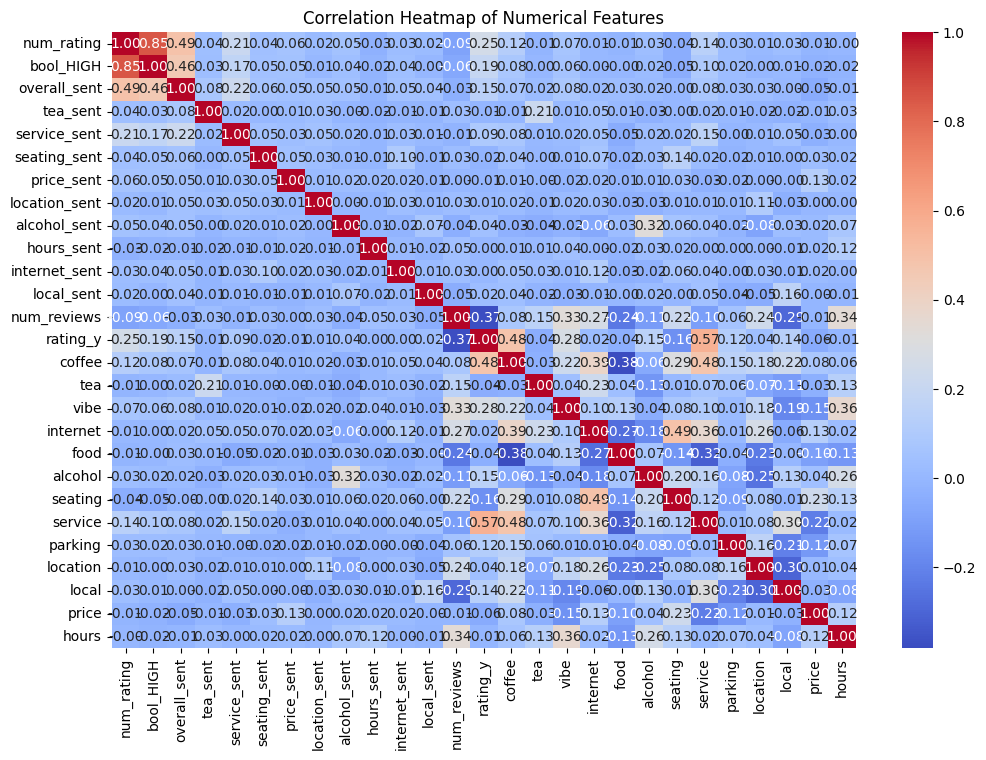

In [ ]:
# Correlation heatmap for numerical features only
numerical_df = df.select_dtypes(include=['number']) # Select only numerical columns

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

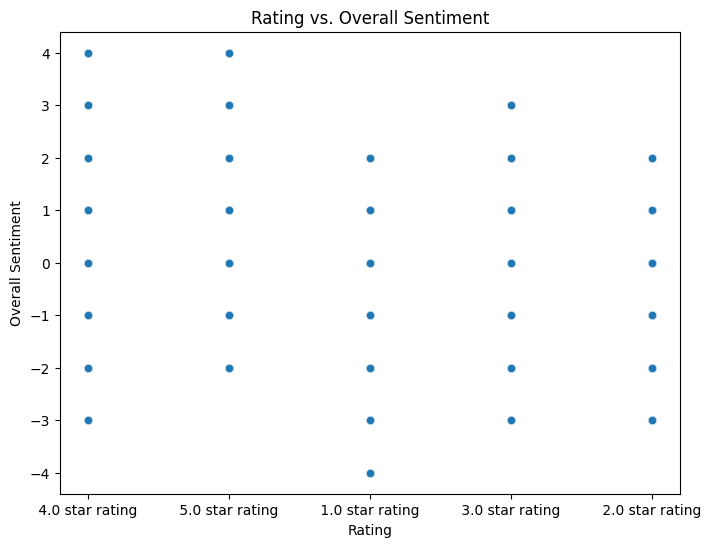

In [ ]:
# Scatter plot to explore relationship between rating and overall sentiment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating_x', y='overall_sent', alpha=0.6)
plt.title("Rating vs. Overall Sentiment")
plt.xlabel("Rating")
plt.ylabel("Overall Sentiment")
plt.show()



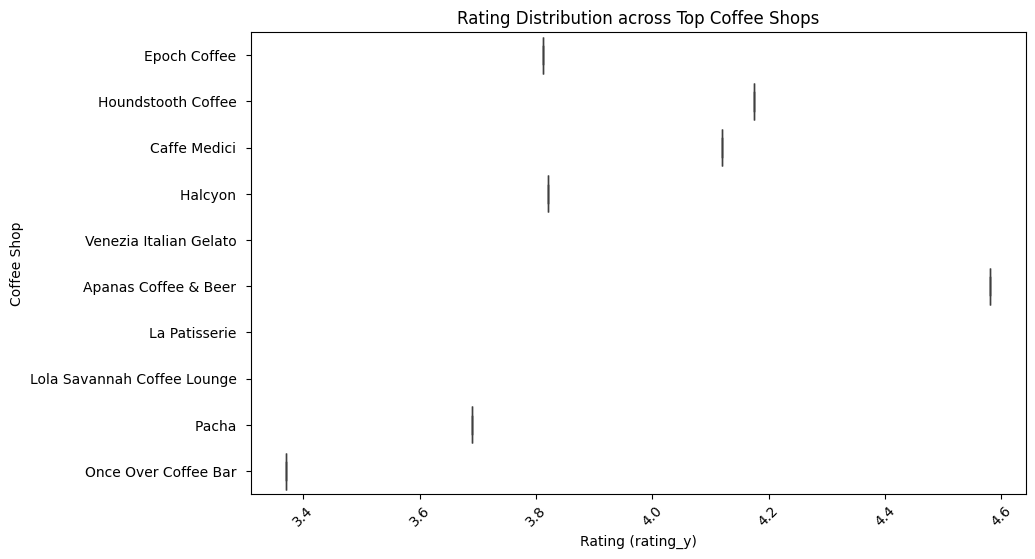

In [ ]:
# Ensure that 'rating_y' is numeric
df['rating_y'] = pd.to_numeric(df['rating_y'], errors='coerce')

# Filter the DataFrame to include only the top coffee shops and drop rows with NaN in 'rating_y'
top_shops = df['coffee_shop_name'].value_counts().head(10).index
filtered_df = df[df['coffee_shop_name'].isin(top_shops)].dropna(subset=['rating_y'])

# Box plot for rating distributions across the top coffee shops using 'rating_y'
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='rating_y', y='coffee_shop_name', order=top_shops)
plt.title("Rating Distribution across Top Coffee Shops")
plt.xlabel("Rating (rating_y)")
plt.ylabel("Coffee Shop")
plt.xticks(rotation=45)
plt.show()



C:\Users\lavyh\AppData\Local\Temp\ipykernel_55980\2183995306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")


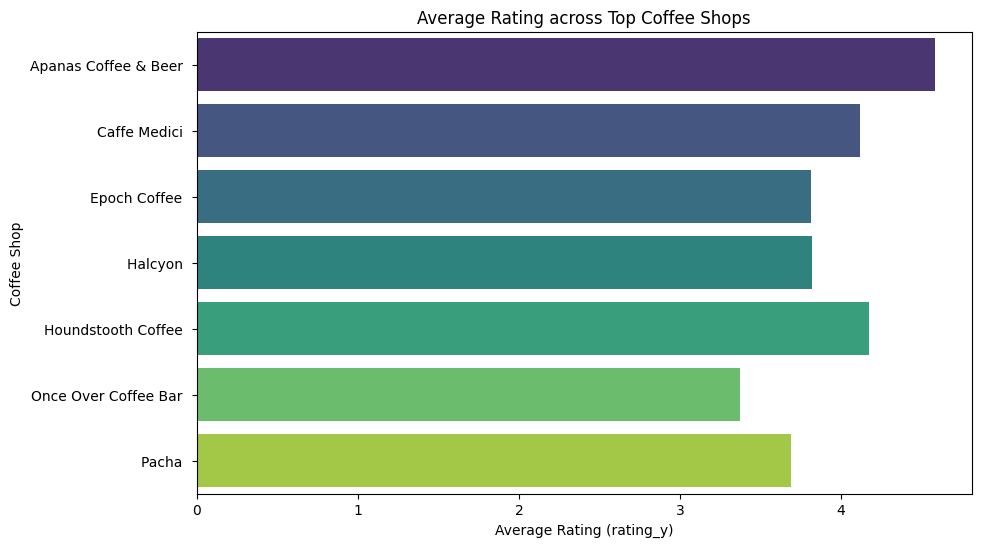

In [ ]:
# Calculate the average rating for each coffee shop
avg_ratings = filtered_df.groupby('coffee_shop_name')['rating_y'].mean()

# Plot average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")
plt.title("Average Rating across Top Coffee Shops")
plt.xlabel("Average Rating (rating_y)")
plt.ylabel("Coffee Shop")
plt.show()


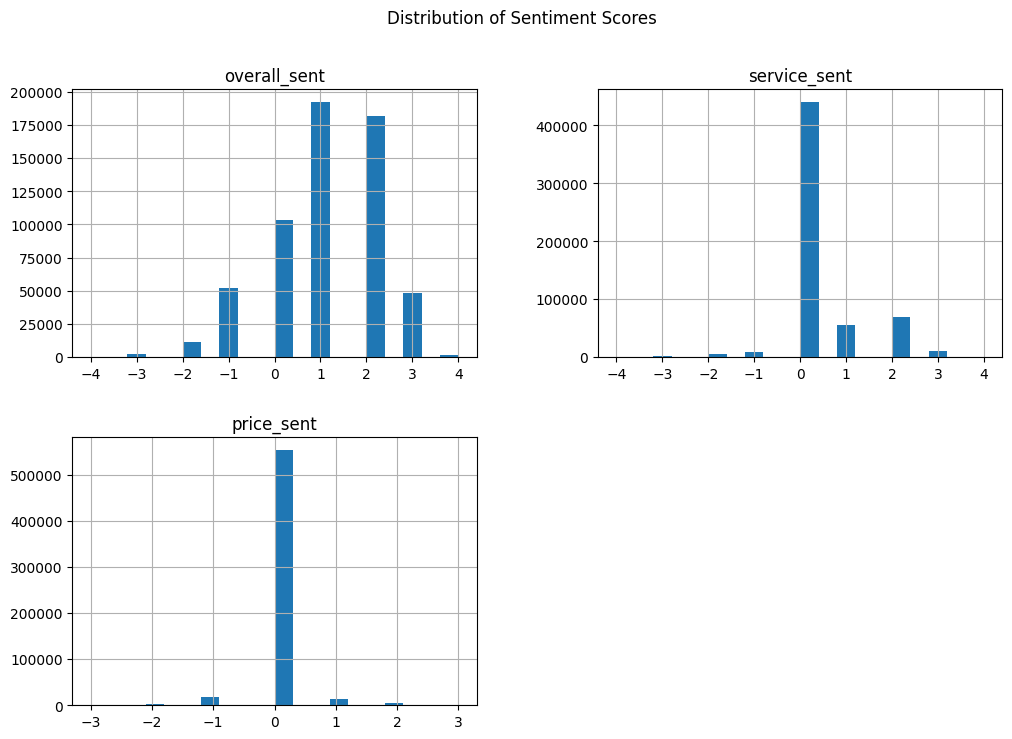

In [ ]:
# Histograms for sentiment columns
sentiment_cols = ['overall_sent', 'vibe_sent', 'service_sent', 'price_sent', 'coffee_sent']
df[sentiment_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Sentiment Scores")
plt.show()


In [ ]:
# Check the number of rows and unique values in filtered_df
print("Filtered DataFrame Info:")
print(filtered_df.info())
print("\nSample Data from filtered_df:")
print(filtered_df.head())

# Check unique values in 'rating_x' to ensure it has valid numeric data
print("\nUnique values in 'rating_x':")
print(filtered_df['rating_x'].unique())


Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 178324 entries, 400 to 570445
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   coffee_shop_name  178324 non-null  object 
 1   review_text       178324 non-null  object 
 2   rating_x          178324 non-null  object 
 3   num_rating        178324 non-null  float64
 4   cat_rating        178324 non-null  object 
 5   bool_HIGH         178324 non-null  float64
 6   overall_sent      178324 non-null  float64
 7   vibe_sent         128324 non-null  object 
 8   tea_sent          178324 non-null  float64
 9   service_sent      178324 non-null  float64
 10  seating_sent      178324 non-null  float64
 11  price_sent        178324 non-null  float64
 12  parking_sent      178324 non-null  object 
 13  location_sent     178324 non-null  float64
 14  alcohol_sent      178324 non-null  float64
 15  coffee_sent       178324 non-null  object 
 16

In [ ]:
# Check the top coffee shops in the dataset
print("Top 10 Coffee Shops by Review Count:")
print(df['coffee_shop_name'].value_counts().head(10))

# Check the unique values in 'rating_x' before any filtering
print("\nUnique values in 'rating_x' before filtering:")
print(df['rating_x'].unique())


Top 10 Coffee Shops by Review Count:
coffee_shop_name
Epoch Coffee                    60000
Houndstooth Coffee              40000
Caffe Medici                    24300
Halcyon                         20100
Venezia Italian Gelato          20000
Apanas Coffee & Beer            13924
La Patisserie                   10000
Lola Savannah Coffee Lounge     10000
Pacha                           10000
Once Over Coffee Bar            10000
Name: count, dtype: int64

Unique values in 'rating_x' before filtering:
[' 4.0 star rating ' ' 5.0 star rating ' ' 1.0 star rating '
 ' 3.0 star rating ' ' 2.0 star rating ' nan]


Chi-Square

In [ ]:
from scipy.stats import chi2_contingency
# Ensure that `rating_y` and `num_reviews` are numeric, coercing any non-numeric values to NaN
df['rating_y'] = pd.to_numeric(df['rating_y'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

# Drop rows with NaN in `rating_y` or `num_reviews` after conversion
df = df.dropna(subset=['rating_y', 'num_reviews'])

# Check max value of num_reviews and ensure it’s suitable for binning
max_reviews = max(df['num_reviews'].max(), 1001)  # Ensure bins are suitable

# Bin `rating_y` into categories: Low, Medium, High
df.loc[:, 'rating_category'] = pd.cut(df['rating_y'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])

# Bin `num_reviews` into categories: Low, Medium, High with a fixed max value
df.loc[:, 'review_category'] = pd.cut(df['num_reviews'], bins=[0, 100, 1000, max_reviews], labels=['Low', 'Medium', 'High'])

# Create a contingency table for `rating_category` and `review_category`
contingency_table = pd.crosstab(df['rating_category'], df['review_category'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Contingency Table:
review_category     Low  Medium
rating_category                
Medium           130300   80100
High             207224   92007
Chi-Square Statistic: 2961.2748240236815
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[139346.01623528  71053.98376472]
 [198177.98376472 101053.01623528]]


C:\Users\lavyh\AppData\Local\Temp\ipykernel_55980\3415190067.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rating_category'] = pd.cut(df['rating_y'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])
C:\Users\lavyh\AppData\Local\Temp\ipykernel_55980\3415190067.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'review_category'] = pd.cut(df['num_reviews'], bins=[0, 100, 1000, max_reviews], labels=['Low', 'Medium', 'High'])


Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Ensure numeric conversion (this is optional if all columns are already numeric)
numeric_cols = ['rating_y', 'num_reviews', 'coffee', 'tea', 'vibe', 'internet', 'food',
                'alcohol', 'seating', 'service', 'parking', 'location', 'local', 'price', 'hours']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the selected columns
df = df.dropna(subset=numeric_cols)

# Define the independent variables (X) and the dependent variable (y)
X = df[['num_reviews', 'coffee', 'tea', 'vibe', 'internet', 'food', 'alcohol',
        'seating', 'service', 'parking', 'location', 'local', 'price', 'hours']]
y = df['rating_y']

C:\Users\lavyh\AppData\Local\Temp\ipykernel_55980\3637907634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.021832456266935186
R-squared (R2): 0.7028864730817233


In [ ]:
# Print the coefficients of each feature
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients of the Regression Model:")
print(coef_df)


Coefficients of the Regression Model:
             Coefficient
num_reviews    -0.000990
coffee          0.589310
tea             0.052760
vibe            0.392085
internet       -0.545401
food            0.084639
alcohol         0.413441
seating        -0.889943
service         0.915701
parking         0.298154
location        0.056795
local          -1.014627
price           0.805576
hours          -0.319626


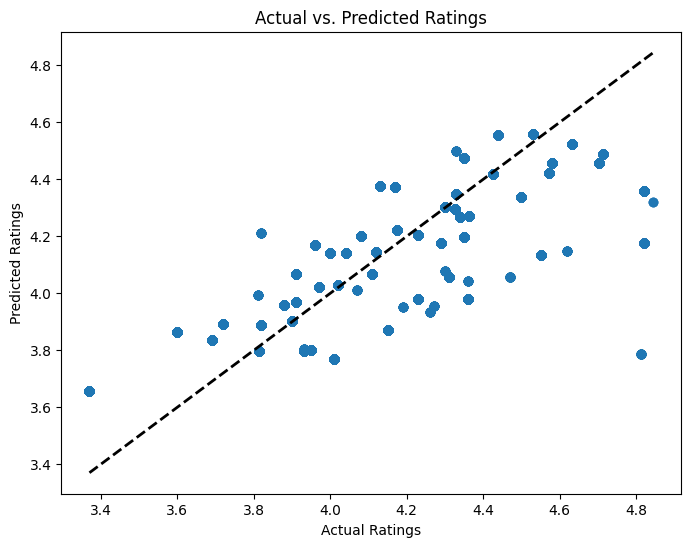

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.show()


In [ ]:
# Ensure that columns are numeric, coercing any non-numeric values to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating_y'] = pd.to_numeric(df['rating_y'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

# Drop rows with NaN in these columns
df = df.dropna(subset=['price', 'rating_y', 'num_reviews'])

# Calculate correlation
price_rating_corr = df['price'].corr(df['rating_y'])
price_reviews_corr = df['price'].corr(df['num_reviews'])

print(f"Correlation between Price and Rating: {price_rating_corr}")
print(f"Correlation between Price and Number of Reviews: {price_reviews_corr}")

Correlation between Price and Rating: -0.05616186204825931
Correlation between Price and Number of Reviews: -0.006827701207828927


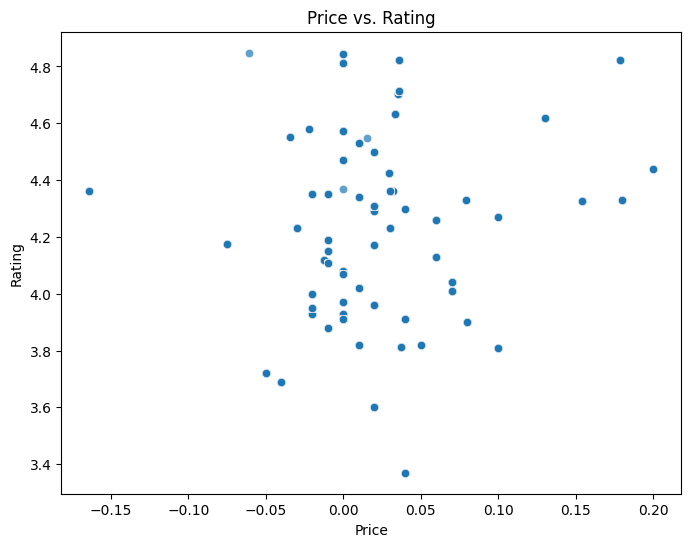

In [ ]:
# Scatter plot for Price vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='rating_y', alpha=0.7)
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

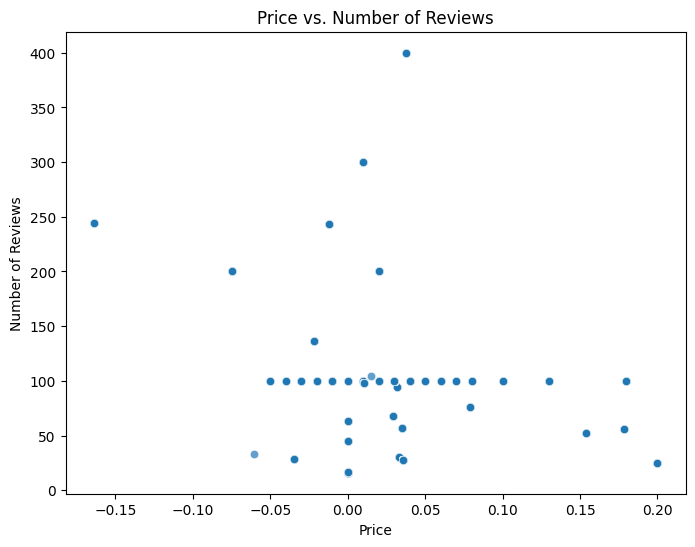

In [ ]:
# Scatter plot for Price vs. Number of Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='num_reviews', alpha=0.7)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.show()